### Feature Scaling

In [1]:
# Normalization and Standarization 
# (values - values.min())/(values.max()-values.mean())
# (values - values.mean())/values.std()


In [2]:
#import lib and load dat 
import pandas as pd
data = pd.read_csv('weather.csv',index_col=0,parse_dates =True)

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   WindGustDir    2301 non-null   object 
 6   WindGustSpeed  2301 non-null   float64
 7   WindDir9am     3281 non-null   object 
 8   WindDir3pm     3304 non-null   object 
 9   WindSpeed9am   3311 non-null   float64
 10  WindSpeed3pm   3312 non-null   float64
 11  Humidity9am    3323 non-null   float64
 12  Humidity3pm    3324 non-null   float64
 13  Pressure9am    3317 non-null   float64
 14  Pressure3pm    3318 non-null   float64
 15  Cloud9am       2771 non-null   float64
 16  Cloud3pm       2776 non-null   float64
 17  Temp9am        3333 non-null   flo

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,2301.000000,3311.000000,3312.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,41.761408,15.070674,19.335447,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,3.319868
std,4.553641,4.494638,9.895172,2.777407,3.810886,13.007523,7.079724,7.482554,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,9.885066
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,31.000000,9.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,50.000000,20.000000,24.000000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.400000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,119.400000


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np 

In [7]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [8]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [9]:
len(data),len(data.dropna())

(3337, 1690)

In [10]:
data_clean = data.drop(['RISK_MM'],axis=1)
data_clean = data_clean.dropna()

In [11]:
X = data_clean.select_dtypes(include='number')
y = data_clean['RainTomorrow']
y = np.array([0 if value =='No' else 1 for value in y])

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
y.sum()

416

In [14]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
pd.DataFrame(X_train).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,14.967160,23.359172,2.870266,5.438831,7.380251,41.638314,15.290680,19.668639,66.163462,52.805473,1018.610133,1016.228624,4.213018,4.173817,18.037426,21.812944
std,4.521918,4.455878,8.526366,2.890897,3.743857,12.569397,6.713926,7.200602,15.082769,15.740255,7.007330,7.046905,2.694492,2.593357,4.931634,4.237434
min,5.000000,13.400000,0.000000,0.000000,0.000000,17.000000,2.000000,2.000000,19.000000,10.000000,996.500000,994.000000,0.000000,0.000000,6.700000,11.700000
25%,11.200000,20.100000,0.000000,3.200000,4.775000,31.000000,11.000000,15.000000,57.000000,42.750000,1014.000000,1011.600000,1.000000,1.750000,14.075000,18.700000
50%,15.000000,23.100000,0.000000,5.000000,8.400000,41.000000,15.000000,20.000000,66.000000,54.000000,1018.500000,1016.350000,5.000000,4.000000,18.300000,21.600000
75%,18.800000,26.300000,1.000000,7.400000,10.300000,50.000000,20.000000,24.000000,78.000000,62.250000,1023.400000,1021.000000,7.000000,7.000000,21.800000,24.700000
max,27.100000,45.800000,94.400000,15.800000,13.600000,96.000000,44.000000,46.000000,98.000000,93.000000,1039.000000,1036.000000,8.000000,8.000000,36.500000,44.700000


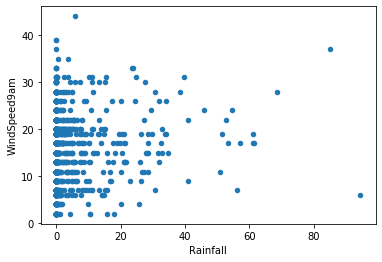

In [16]:
X_train.plot.scatter(x='Rainfall',y='WindSpeed9am')

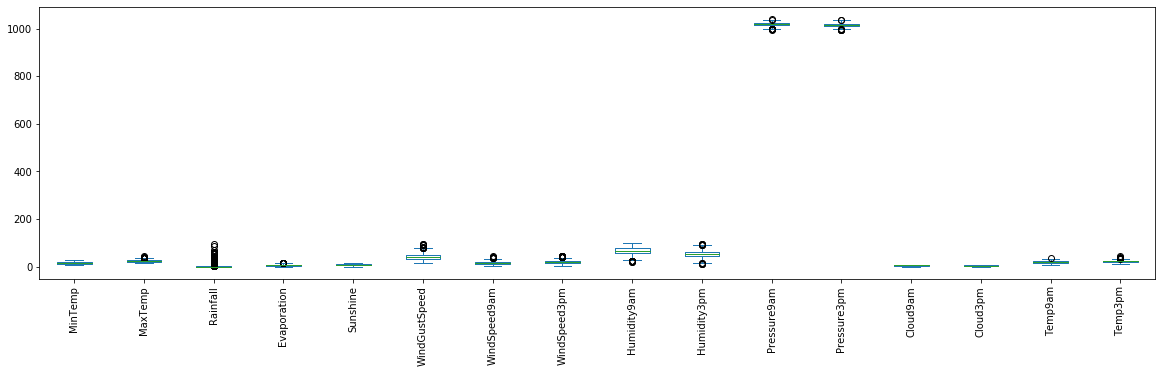

In [17]:
# Box Plot 
X_train.plot.box(figsize=(20,5),rot=90)

In [18]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)


In [19]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,0.451003,0.307382,0.030405,0.344230,0.542666,0.311877,0.316445,0.401560,0.597006,0.515729,0.520238,0.529253,0.526627,0.521727,0.380451,0.306453
std,0.204612,0.137527,0.090322,0.182968,0.275284,0.159106,0.159855,0.163650,0.190921,0.189642,0.164878,0.167783,0.336812,0.324170,0.165491,0.128407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280543,0.206790,0.000000,0.202532,0.351103,0.177215,0.214286,0.295455,0.481013,0.394578,0.411765,0.419048,0.125000,0.218750,0.247483,0.212121
50%,0.452489,0.299383,0.000000,0.316456,0.617647,0.303797,0.309524,0.409091,0.594937,0.530120,0.517647,0.532143,0.625000,0.500000,0.389262,0.300000
75%,0.624434,0.398148,0.010593,0.468354,0.757353,0.417722,0.428571,0.500000,0.746835,0.629518,0.632941,0.642857,0.875000,0.875000,0.506711,0.393939
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


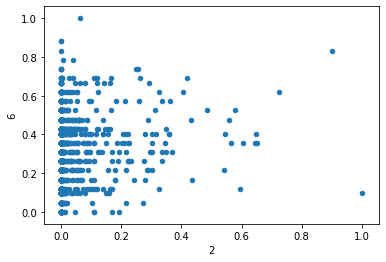

In [20]:
pd.DataFrame(X_train_norm).plot.scatter(x=2,y=6)

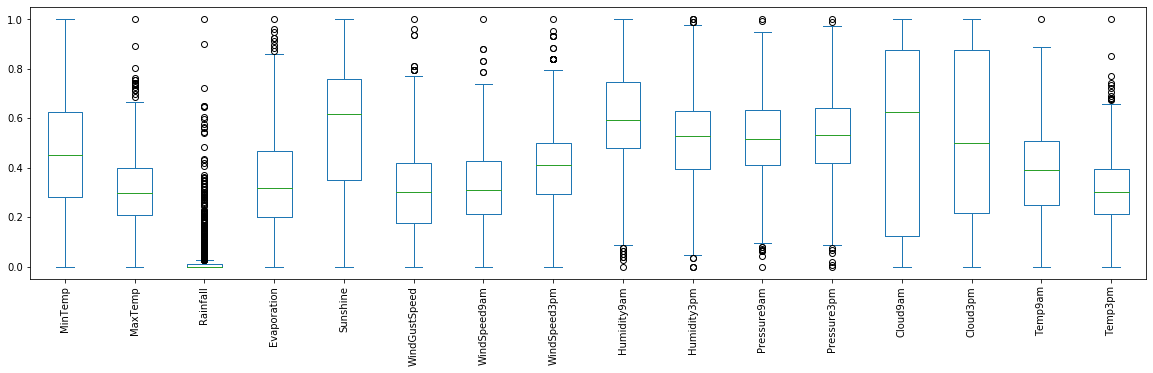

In [21]:
pd.DataFrame(X_train_norm,columns=X_train.columns).plot.box(figsize=(20,5),rot=90)

In [52]:
# Standarization 
from sklearn.preprocessing import StandardScaler
st = StandardScaler().fit(X_train)
X_train_st = st.transform(X_train)
X_test_st = st.transform(X_test)

In [23]:
pd.DataFrame(X_train_st).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03
mean,-1.649732e-16,1.048635e-16,-1.115971e-16,-3.688700e-16,-1.380388e-16,1.989697e-16,4.762791e-18,7.316633e-17,3.865251e-16,-1.269530e-16,4.046617e-15,-1.079430e-14,-1.753610e-16,-4.984507e-17,3.326563e-16,-2.841251e-17
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-2.205004e+00,-2.235891e+00,-3.367587e-01,-1.882061e+00,-1.972026e+00,-1.960908e+00,-1.980302e+00,-2.454680e+00,-3.128133e+00,-2.720497e+00,-3.156454e+00,-3.155548e+00,-1.564145e+00,-1.610022e+00,-2.299770e+00,-2.387456e+00
25%,-8.333972e-01,-7.317025e-01,-3.367587e-01,-7.747284e-01,-6.961312e-01,-8.466795e-01,-6.393082e-01,-6.486078e-01,-6.077699e-01,-6.390744e-01,-6.581450e-01,-6.570738e-01,-1.192880e+00,-9.349708e-01,-8.037686e-01,-7.349014e-01
50%,7.265144e-03,-5.818550e-02,-3.367587e-01,-1.518538e-01,2.724799e-01,-5.080194e-02,-4.331118e-02,4.603553e-02,-1.084164e-02,7.591800e-02,-1.572266e-02,1.723035e-02,2.921788e-01,-6.704857e-02,5.326250e-02,-5.027160e-02
75%,8.479274e-01,6.602327e-01,-2.194321e-01,6.786456e-01,7.801658e-01,6.654878e-01,7.016851e-01,6.017502e-01,7.850626e-01,6.002458e-01,6.838039e-01,6.773386e-01,1.034708e+00,1.090181e+00,7.632291e-01,6.815740e-01
max,2.684111e+00,5.038093e+00,1.073888e+01,3.585393e+00,1.661936e+00,4.326524e+00,4.277667e+00,3.658181e+00,2.111570e+00,2.554558e+00,2.910868e+00,2.806720e+00,1.405973e+00,1.475924e+00,3.745089e+00,5.403159e+00


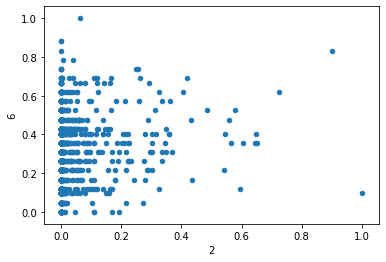

In [24]:
pd.DataFrame(X_train_norm).plot.scatter(x=2,y=6)

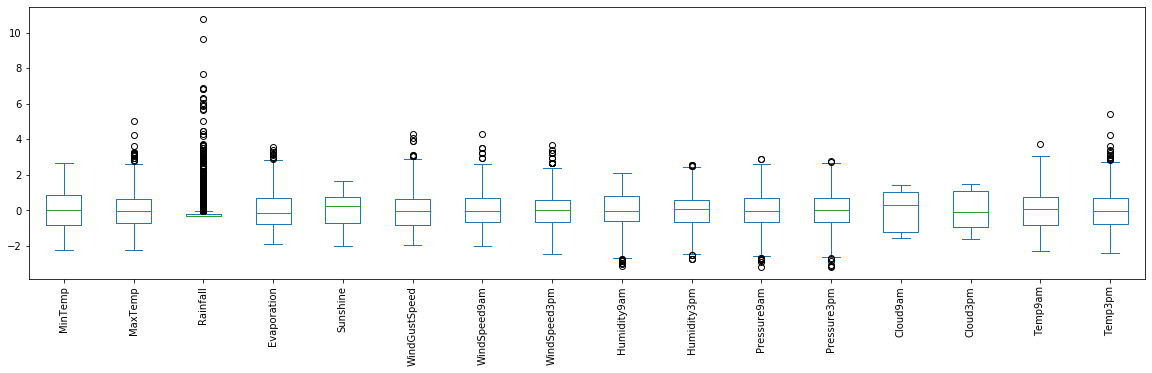

In [25]:
pd.DataFrame(X_train_st,columns=X_train.columns).plot.box(figsize=(20,5),rot=90)

In [26]:
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
score = []
trainx = [X_train,X_train_norm,X_train_st]
testx = [X_test,X_test_norm,X_test_st]
for train,test in zip(trainx ,testx):
    svc=SVC()
    svc.fit(train,y_train)
    ypred = svc.predict(test)
    score.append(accuracy_score(y_test,ypred))

In [33]:
dfsvc = pd.DataFrame({'Accuracy Score':score},index=['Original','Normalize','Standarized'])
dfsvc

,Accuracy Score
Original,0.754438
Normalize,0.881657
Standarized,0.875740


In [34]:
score1 =[]
for tr,te in zip(trainx ,testx):
    knn=KNeighborsClassifier()
    knn.fit(tr,y_train)
    ypred = knn.predict(te)
    score1.append(accuracy_score(y_test,ypred))
score1

[0.8520710059171598, 0.834319526627219, 0.8254437869822485]

In [35]:
dfknn = pd.DataFrame({'Accuracy Score':score1},index=['Original','Normalize','Standarized'])
dfknn

,Accuracy Score
Original,0.852071
Normalize,0.834320
Standarized,0.825444


## Project Feature Scaling 

In [36]:
# Libraries 
import matplotlib.pyplot as plt 
%matplotlib inline

In [40]:
# Load perquet data 
d = pd.read_parquet('soccer.parquet')
d.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [41]:
d.dtypes

player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

In [42]:
dc = d.dropna()

In [43]:
dc.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [44]:
len(dc),len(d)

(180354, 183978)

In [45]:
ld = dc.iloc[:2000]

In [46]:
ld.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [47]:
len(ld)

2000

In [48]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2043
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   2000 non-null   int64  
 1   player_api_id        2000 non-null   int64  
 2   date                 2000 non-null   object 
 3   overall_rating       2000 non-null   float64
 4   potential            2000 non-null   float64
 5   preferred_foot       2000 non-null   object 
 6   attacking_work_rate  2000 non-null   object 
 7   defensive_work_rate  2000 non-null   object 
 8   crossing             2000 non-null   float64
 9   finishing            2000 non-null   float64
 10  heading_accuracy     2000 non-null   float64
 11  short_passing        2000 non-null   float64
 12  volleys              2000 non-null   float64
 13  dribbling            2000 non-null   float64
 14  curve                2000 non-null   float64
 15  free_kick_accuracy   2000 non-null   f

In [ ]:
from

In [49]:
X = ld.drop(['preferred_foot'],axis=1).select_dtypes(include='number')
y=ld['preferred_foot']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [64]:
norm = MinMaxScaler().fit(X_train)
X_train_no = norm.transform(X_train)
X_test_no = norm.transform(X_test)
s = StandardScaler().fit(X_train)
X_train_s = s.transform(X_train)
X_test_s = s.transform(X_test)
from sklearn.inspection import permutation_importance

In [56]:
trainn = [X_train,X_train_no,X_train_s]
tests = [X_test,X_test_no,X_test_s]
score = []
for tn,ts in zip(trainn,tests):
    svc = SVC()
    svc.fit(tn,y_train)
    ypre = svc.predict(ts)
    score.append(accuracy_score(y_test,ypre))
  

In [57]:
score

[0.73, 0.94, 0.965]

In [59]:
dd = pd.DataFrame({'Accuracy Score': score},index = ['Original','Normalize','Standarized'])
dd

,Accuracy Score
Original,0.730
Normalize,0.940
Standarized,0.965


In [74]:
scv= SVC()
perm = permutation_importance(svc,X_test_no,y_test)
perm.importances_mean

array([ 0.0015,  0.009 ,  0.    ,  0.0035,  0.0175,  0.0025,  0.0075,
        0.0005,  0.0355,  0.0025,  0.0265,  0.001 ,  0.021 ,  0.011 ,
        0.001 ,  0.003 ,  0.0075,  0.005 ,  0.005 ,  0.0055,  0.0015,
        0.008 ,  0.0195,  0.0115,  0.0125,  0.001 ,  0.0105,  0.0135,
        0.0005, -0.0005, -0.003 ,  0.008 ,  0.004 ,  0.001 ,  0.0115,
        0.0025,  0.0015])

In [79]:
sortindx = perm.importances_mean.argsort()
df1=pd.DataFrame(perm.importances_mean[sortindx],X_test.columns[sortindx],columns=['Value'])

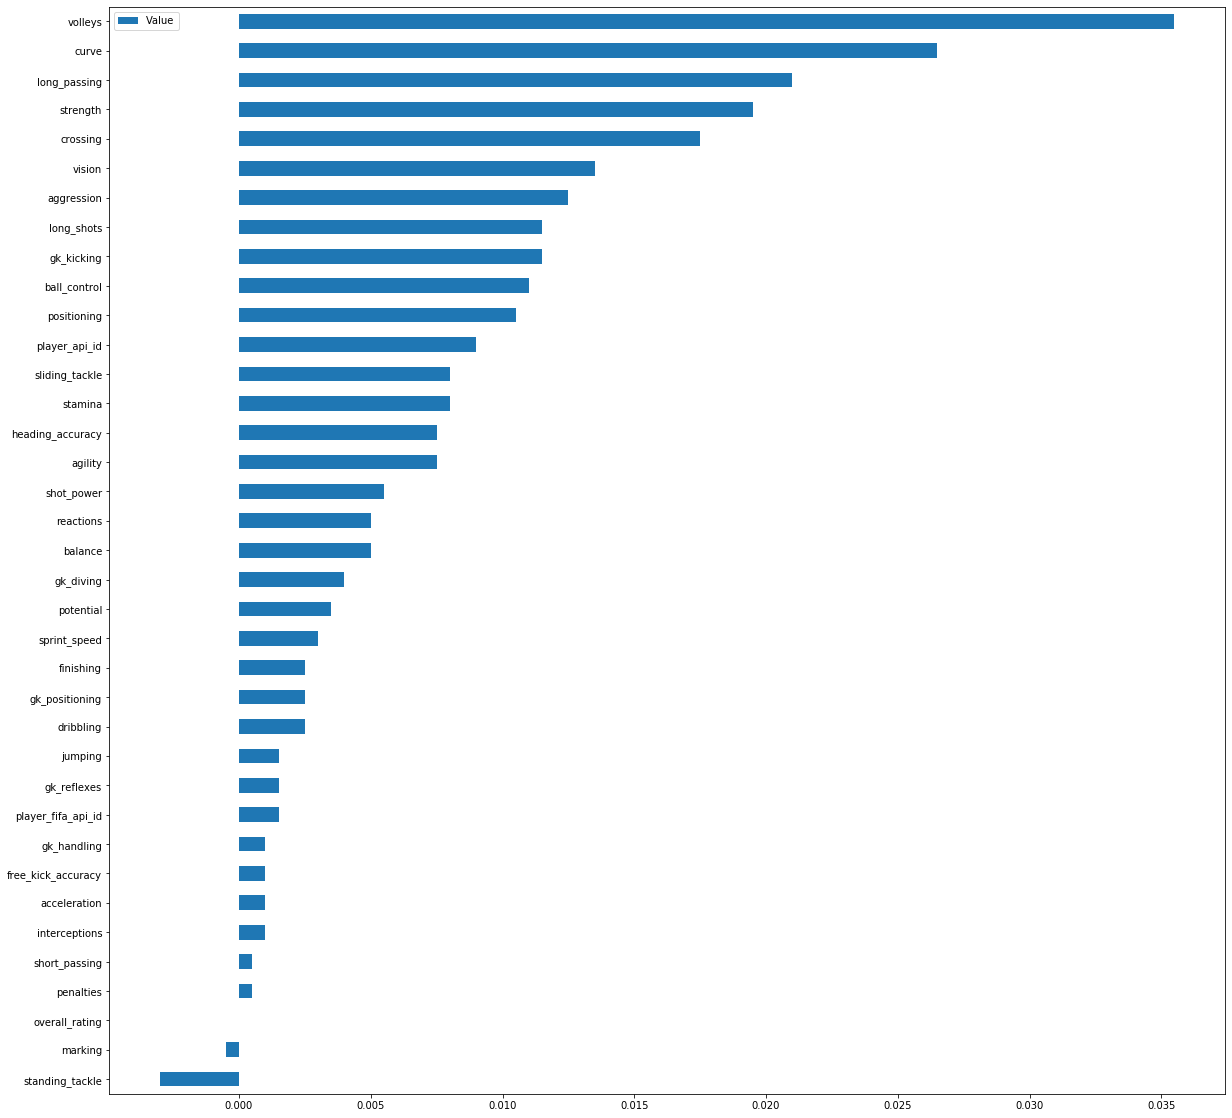

In [80]:
df1.plot.barh(figsize=(20,20))

In [63]:
score1= []
for tr,te in zip(trainn,tests):
        knn=KNeighborsClassifier()
        knn.fit(tr,y_train)
        ypred = knn.predict(te)
        score1.append(accuracy_score(y_test,ypred))
score1

[0.9925, 0.9875, 0.9925]

In [77]:
scv= SVC()
perm1 = permutation_importance(svc,X_test_s,y_test)
perm1.importances_mean
sortindx = perm1.importances_mean.argsort()
df=pd.DataFrame(perm1.importances_mean[sortindx],X_test.columns[sortindx],columns=['Value'])

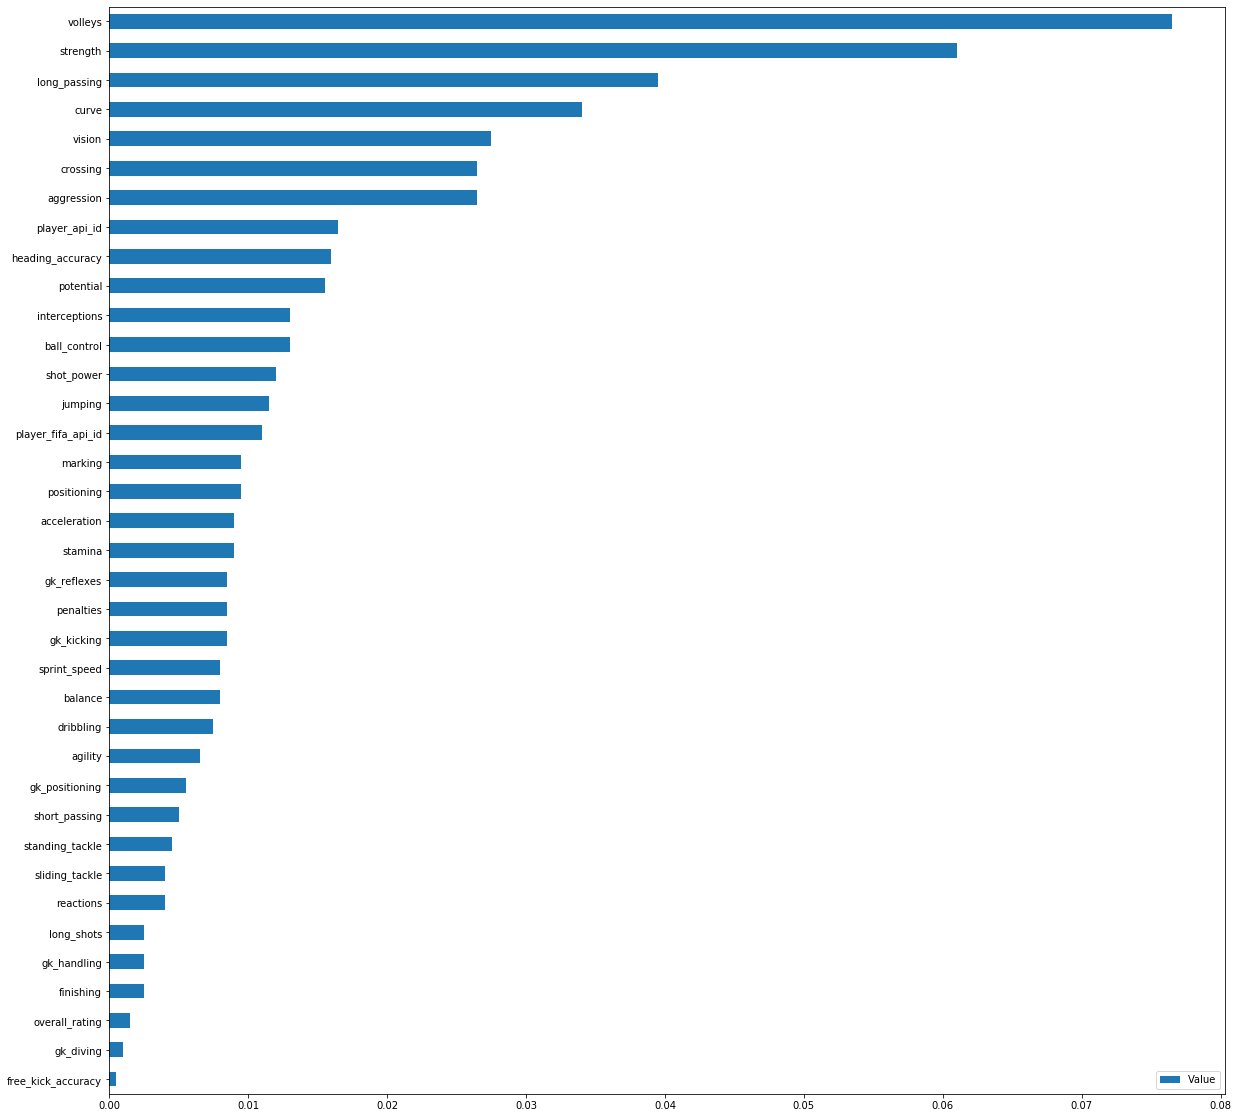

In [78]:
df.plot.barh(figsize=(20,20))